# Kaagle - House Price Advanced Regression Techniques

#### We'll start our study looking for an overview of the data distribution focusing on the variable that we intend to predict, the "SalePrice" column.

#### First of all it is interesting have some idea of our database size as well as general statistical data about each columns.

In [1]:
import pandas as pd
import numpy as np
import collections as cl
import warnings,string, dfview # https://github.com/xslyr/DataOverview

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt 

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

df = pd.read_csv('General_Files/train.csv')
df = df.sort_values('SalePrice',ascending=True)
df = df.drop(['Id'],axis=1)
print('\nOur Dataframe Shape has {} lines e {} columns.\n'.format(df.shape[0],df.shape[1]))
dfinfo = dfview.DataOverview(df)
dfinfo.columns_type()
dfinfo.details


Our Dataframe Shape has 1460 lines e 80 columns.



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
dtype,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64
count,1460,1460,1201,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1452,1460,1460,1460,1423,1423,1422,1423,1460,1422,1460,1460,1460,1460,1460,1460,1459,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,770,1379,1379,1379,1460,1460,1379,1379,1460,1460,1460,1460,1460,1460,1460,7,281,54,1460,1460,1460,1460,1460,1460
null,0,0,259,0,0,1369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,8,0,0,0,37,37,38,37,0,38,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,690,81,81,81,0,0,81,81,0,0,0,0,0,0,0,1453,1179,1406,0,0,0,0,0,0
min,20.0,0.0,21.0,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1872.0,1950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,334.0,0.0,0.0,334.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,0.0,0.0,34900.0
mean,56.9,0.0,70.05,10516.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1,5.58,1971.27,1984.87,0.0,0.0,0.0,0.0,0.0,103.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,443.64,0.0,46.55,567.24,1057.43,0.0,0.0,0.0,0.0,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,0.0,6.52,0.0,0.61,0.0,0.0,1978.51,0.0,1.77,472.98,0.0,0.0,0.0,94.24,46.66,21.95,3.41,15.06,2.76,0.0,0.0,0.0,43.49,6.32,2007.82,0.0,0.0,180921.2
max,190.0,0.0,313.0,215245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,9.0,2010.0,2010.0,0.0,0.0,0.0,0.0,0.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5644.0,0.0,1474.0,2336.0,6110.0,0.0,0.0,0.0,0.0,4692.0,2065.0,572.0,5642.0,3.0,2.0,3.0,2.0,8.0,3.0,0.0,14.0,0.0,3.0,0.0,0.0,2010.0,0.0,4.0,1418.0,0.0,0.0,0.0,857.0,547.0,552.0,508.0,480.0,738.0,0.0,0.0,0.0,15500.0,12.0,2010.0,0.0,0.0,755000.0
median,50.0,0.0,69.0,9478.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,5.0,1973.0,1994.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,383.5,0.0,0.0,477.5,991.5,0.0,0.0,0.0,0.0,1087.0,0.0,0.0,1464.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,6.0,0.0,1.0,0.0,0.0,1980.0,0.0,2.0,480.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,0.0,0.0,163000.0
std,42.3,0.0,24.28,9981.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.38,1.11,30.2,20.65,0.0,0.0,0.0,0.0,0.0,181.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,456.1,0.0,161.32,441.87,438.71,0.0,0.0,0.0,0.0,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.5,0.82,0.22,0.0,1.63,0.0,0.64,0.0,0.0,24.69,0.0,0.75,213.8,0.0,0.0,0.0,125.34,66.26,61.12,29.32,55.76,40.18,0.0,0.0,0.0,496.12,2.7,1.33,0.0,0.0,79442.5
std%,24.88,0.0,8.32,4.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.37,13.91,21.89,34.41,0.0,0.0,0.0,0.0

#### Just as initial curiosity, I quote below how the distribution of column types:

In [2]:
dfinfo.columns_type()

{'int64': 34, 'float64': 3, 'object': 43, 'bool': 0, 'datetime64': 0}

#### We will do a  better analysis of each column data in later files "Step 2.1, 2.2 and 3".

#### When we checking the data dictionary, we see there are many interesting data to be studied, however, in this first moment, we'll analyze the relationship between the neighborhood and the value of the house.

#### For this, we chose to group the houses by a certain price range and correlate them with the neighborhood where they are located. This information will give us a certain perception about the "quality of the neighborhood", whether it is high, middle or lower social class.

#### Check the chart below as well as a summary table with quantity, minimum and maximum values for each of these groups.

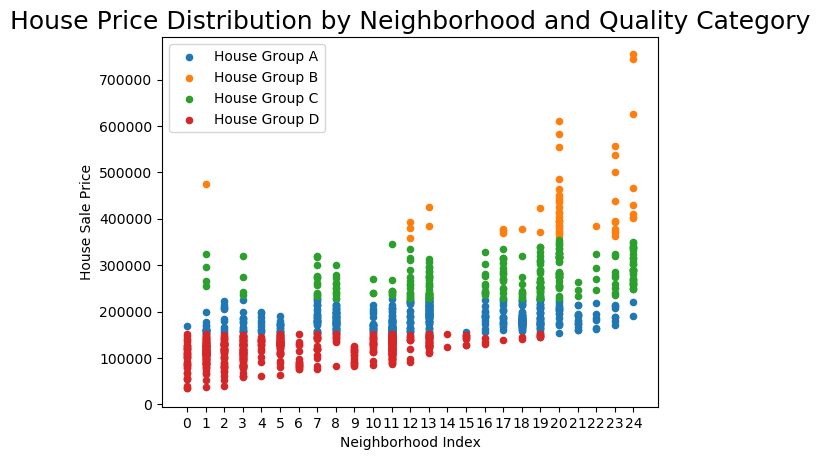

,House Group A,House Group B,House Group C,House Group D
Count,525.0,53.0,247.0,635.0
Min,153000.0,359100.0,228950.0,34900.0
Max,228500.0,755000.0,354000.0,152000.0


In [3]:
x = df[['Neighborhood','SalePrice']].sort_values('SalePrice',ascending=True).values

lble = LabelEncoder()
lble.fit(x[:,0])

current_sort =[]
for i in x[:,0]:
    if i not in current_sort:
        current_sort.append(i)

lble.classes_ = np.array(current_sort, dtype=object)
x[:,0] = lble.transform(x[:,0])

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

for i,c in enumerate(wcss):
    if c/wcss[0]<0.20:
        n_clusters = i+1
        break

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init='auto', random_state = 0)
y_kmeans = kmeans.fit_predict(x)

color_cycle = plt.rcParams["axes.prop_cycle"]()

for n,c in zip(range(n_clusters), color_cycle):
    plt.scatter(x[y_kmeans == n, 0], x[y_kmeans == n, 1], 
                s=20, c = c['color'], label ='House Group {}'.format(string.ascii_uppercase[n]))

plt.rcParams['figure.figsize'] = [12, 7]
plt.title('House Price Distribution by Neighborhood and Quality Category', fontsize=18)
plt.xlabel('Neighborhood Index')
plt.xticks(range( x[:,0].min(), x[:,0].max()+1 ))
plt.ylabel('House Sale Price')
plt.legend()
plt.show()

groups_overview = pd.DataFrame(np.zeros(shape=(3,0)), index=['Count', 'Min', 'Max'])

for n in range(n_clusters):
    aux = pd.DataFrame(np.zeros(shape=(3,1)), index=['Count', 'Min', 'Max'], columns=['House Group {}'.format(string.ascii_uppercase[n])])
    aux.loc['Count'] = len(x[y_kmeans==n][:,1])
    aux.loc['Min'] = x[y_kmeans==n][:,1].min()
    aux.loc['Max'] = x[y_kmeans==n][:,1].max()
    groups_overview = pd.concat([groups_overview, aux], axis=1)

groups_overview

#### We believe that the perception of neighborhood quality is possibly something important on house buying process, so we'll testing our model creating an additional column in dataframe to classify neighborhood quality based on the house values contained them.

#### Just below, we sort the values and plot a graph to better understand which regression model will fit for this case.

#### This inference does not rule out the possibility of testing other models in the final stage of this project.

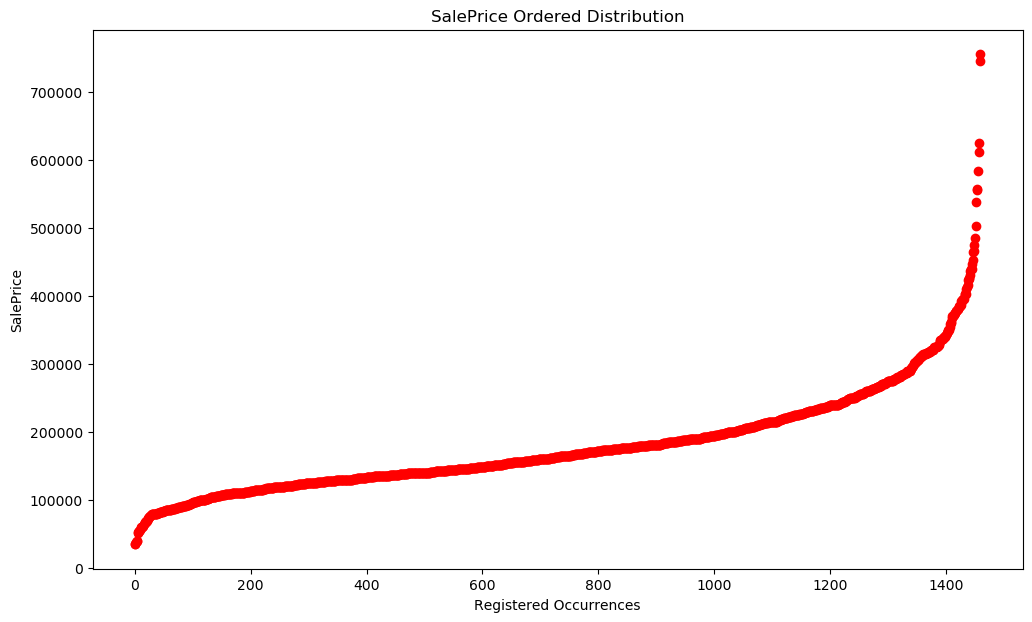

In [4]:
y_train = df['SalePrice']
x_axis = np.array([[i] for i in range(y_train.shape[0])])

plt.scatter(x_axis, y_train, color = 'red')
plt.title('SalePrice Ordered Distribution')
plt.xlabel('Registered Occurrences')
plt.ylabel('SalePrice')
plt.show()

#### For now, we understand that the best model to be adopted is a polynomial regression.
#### In the following files we will deal with columns of type int and float.